# Linear Regression

To simplify, Linear Regression is simply a weighted sum of inputs plus a constant:


$\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{n}x_n$


### Simple Linear Regression

Creating a simple one dimentional function of a linear relation between X and y: 

$\hat{y} = \beta_{0} + \beta_{1}x_1 $

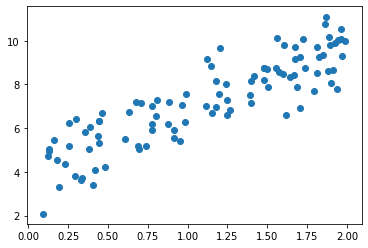

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100) 
y = 4 + 3 * X + np.random.randn(100)

data = pd.DataFrame({'covariate':X, 'response':y})

plt.scatter(X, y)

### Least Squares Estimates

the least squares estimates for $\theta_{0}$ and $\theta_{1}$ is:

$\beta_{0} = \frac{\sum_{i=0}^{n}(X_i - \hat{X_n})(Y_i - \hat{Y_n})}{\sum_{i=0}^{n}(X_i - \hat{X_n})^2} $

$\beta_{1} = \hat{Y_n} - \beta_{0} * \hat{X_n} $


In [2]:
def deviation(array):
    return [x-np.mean(array) for x in array]

def squared_deviation(array):
    return [(x-np.mean(array))**2 for x in array]

print(deviation(X)[:4])
print(squared_deviation(X)[:4])

[0.8506368852329649, 0.8190652412030945, -0.4296287350629615, 0.44393780384597004]
[0.7235831105188403, 0.6708678693470834, 0.18458084999180038, 0.19708077368358295]


In [3]:
def least_squares_fit(X, y):
    numerator = np.sum([x_dev*y_dev for x_dev, y_dev in zip(deviation(X), deviation(y))])
    denominator = np.sum(squared_deviation(X))
    
    slope = numerator/denominator

    intercept = np.mean(y) - slope * np.mean(X) 

    return intercept, slope

least_squares_fit(X, y)

(4.054741532063835, 2.8585841427301237)

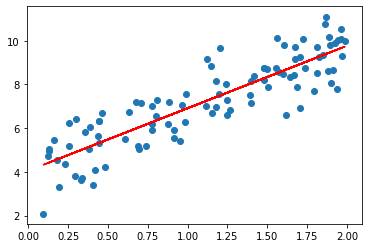

In [4]:
intercept, slope = least_squares_fit(X, y)

y_pred = intercept + X*slope

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

### Plot the residuals

The error term or residuals assume to be:

* Normally distributed
* Homoscedastic (same variance for every X)
* Independent 


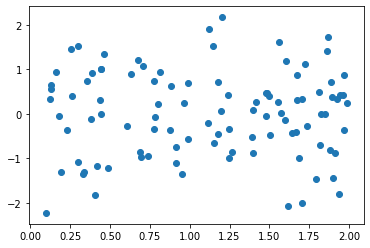

In [5]:
residuals = [ (real - pred) for real, pred in zip(y, y_pred)]
plt.scatter(X, residuals)

There is no trend or variance changing for X 

In [6]:
pd.Series(residuals).describe()

count    1.000000e+02
mean     1.545430e-15
std      9.558069e-01
min     -2.236390e+00
25%     -7.119991e-01
50%      4.545088e-02
75%      6.972607e-01
max      2.175773e+00
dtype: float64

(array([ 5.,  3., 11., 11., 16., 19., 14., 12.,  7.,  2.]),
 array([-2.23639049, -1.79517418, -1.35395787, -0.91274156, -0.47152526,
        -0.03030895,  0.41090736,  0.85212367,  1.29333997,  1.73455628,
         2.17577259]),
 <a list of 10 Patch objects>)

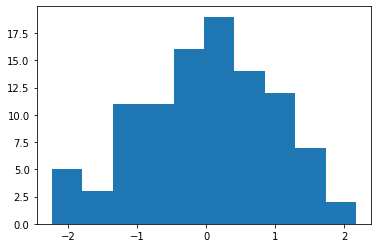

In [7]:
plt.hist(residuals)

The hist seem like to have a small skeweness to the left (Negative skewed)

In [16]:
def RSS(y, y_pred):
    square_erors = [ (real - pred)**2 for real, pred in zip(y, y_pred)]
    return sum(square_erors)

def RSE(y, y_pred):
    rss = RSS(y, y_pred)
    return np.sqrt(rss/(len(y)-2))

rse = RSE(y, y_pred)
print(rse)

0.9606710834083279


In [17]:
se_intercept = rse * (1/len(X) + np.average(X)/np.sum(squared_deviation(X)))
se_slope = rse * 1/np.sum(squared_deviation(X))

print('SE Intercept: {}\nSE slope: {}'.format(se_intercept, se_slope))

SE Intercept: 0.039597666338773964
SE slope: 0.026792102878822752
